## ESCI 895
## Ryan Siegel
## Final Project
## Heat Flow of Water Through The Riparian Enviornment of the Zealand River and Hale Brook

### The Zealand River Study Area
<img src="image.png" width="400" height="500"/>
<img src="Zealand Google Earth.png" width="400" height="500"/>

### Left Image Created By Lightbody Research Group

### Introduction
The above study location is located in the White Mountains of northern New Hampshire. The site has undergone a restoration project that diverts the main flow of water to the Zealand River (eastern stream) away from Hale Brook (western stream). This is a riparian environment with a shallow water table located between the two streams, where the forested area can thrive. The temperature of a stream strongly impacts the ecology of that environment. Brook trout call Hale Brook home, and these fish thrive in colder waters. 

Thanks to the research conducted by Dr. Lightbody, Ryan Omslear, and River Khoriaty, it is assumed that the Zealand River is a losing stream, and Hale Brook is a gaining stream, with groundwater acting as a conduit between them. Another way to see this relationship between the stream and the groundwater is to use heat flow as a tool (USGS, 2003). Can this relationship between the Zealand River losing water to the groundwater to the west and Hale Brook gaining from this groundwater be seen with the use of heat flow as a tool?

### Methods
Using surface water temperature and groundwater temperature from 11 wells, (six utilized), provided by River Khoriaty, and radiation data from National Ecological Observatory Network (NEON). Data was collected from June to September 2025. Heat flow due to radiation of surface water in the streams, the heat flow due to conduction into and out of the groundwater, and their relationship to each other can be calculated. First looking at the heat flow due to radiation of the zealand. Followed with the correlation between surface water temperatures in the Zealand and the groundwater temperatures to the west due to conduction. Finally looking at the influence of radiation heat flow on Hale Brook and the influx of groundwater. By comparing the two heat fluxs into Hale Brook, and comparing them to the Zealand, conclusions be drawn to help the understanding of how heat flow is a core variable in this riparian environment. This can also help in solidifying the claim that the flow of water is from the Zealand River into Hale Brook.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import glob
import matplotlib.pyplot as plt

### Parameters
Includes Variables Used Throughout the Whole Notebook

In [2]:
gw = Path("gw data")
sw = Path("Surface water files")
first = Path("gw data")/"gw_ll05_09_15_2025.csv"
radiation = Path('Rad Data')
aquifer_k = 2 #W/m/K Up to change
L = 2 #Length in Meters Ground Water to Surface Water
L_03 = 35
L_05 = 35
L_08 = 45
GW_Area = 4 #Area in Sq M, based on Length Measurement Used and 2 meter Width
GW_Area_03 = 70
GW_Area_05 = 70
GW_Area_08 = 90
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m²·K⁴)
albedo = 0.06    # typical for water
emissivity = 0.97 # typical for water
absorptivity_w = 0.9 # typical for water
zealand_sqm = 4700 #approximent square meters of exposed to direct sunlight
hale_sqm = 10000

### Function for Loading in Water Temp Data
This Function is Used Twice. Once For Surface and Once for Ground Water

In [3]:

def load_filtered_w_data_pivoted(folder_path):
    folder = Path(folder_path)
    all_dfs = []

    for file in folder.glob("*.csv"):
        try:
            # Extract well/site ID from filename
            well_id = file.stem

            df = pd.read_csv(file, skiprows=11, encoding='latin1', sep=',', engine='python')
            df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='mixed', errors='coerce')
            df.dropna(subset=['DateTime'], inplace=True)
            df.set_index('DateTime', inplace=True)

            # Filter: on the hour and every two hours
            mask = (df.index.minute == 0) & (df.index.second == 0) & (df.index.hour % 2 == 0)
            filtered = df[mask].copy()

            # Drop unnecessary columns
            filtered.drop(columns=['Date', 'Time', 'ms'], errors='ignore', inplace=True)

            # Rename columns to include well ID
            filtered.columns = [f"{col}_{well_id}" for col in filtered.columns]

            # Keep only columns that contain 'TEMPERATURE' (case-insensitive)
            temperature_cols = [col for col in filtered.columns if 'TEMPERATURE' in col.upper()]
            filtered = filtered[temperature_cols]

            # Replace 0s with NaN only in temperature columns
            filtered = filtered.replace(0, np.nan)

            # Interpolate only the replaced 0s (preserving original NaNs)
            interpolated = filtered.interpolate(limit_direction='both')

            # Restore original NaNs (if any) by masking only the replaced 0s
            filtered = filtered.where(filtered != 0, interpolated)

            all_dfs.append(filtered)

        except Exception as e:
            print(f"Error processing {file.name}: {e}")

    # Combine all filtered DataFrames on DateTime index
    if all_dfs:
        combined_df = pd.concat(all_dfs, axis=1)
        combined_df.sort_index(inplace=True)
        return combined_df
    else:
        return pd.DataFrame()


### Load Groundwater Temperature Data

In [4]:
dfgw = load_filtered_w_data_pivoted(gw)
dfgw

,TEMPERATURE_gw_ll02_09_15_2025,TEMPERATURE_gw_ll03_08_22_2025,TEMPERATURE_gw_ll03_09_15_2025,TEMPERATURE_gw_ll04_09_15_2025,TEMPERATURE_gw_ll05_08_22_2025,TEMPERATURE_gw_ll05_09_15_2025,TEMPERATURE_gw_ll08_09_15_2025
DateTime,,,,,,,
2025-06-02 14:00:00,NaN,8.444,NaN,6.665,8.915,NaN,8.781
2025-06-02 16:00:00,NaN,8.442,NaN,6.630,8.895,NaN,8.748
2025-06-02 18:00:00,NaN,8.435,NaN,6.612,8.871,NaN,8.719
2025-06-02 20:00:00,NaN,8.429,NaN,6.597,8.846,NaN,8.693
2025-06-02 22:00:00,NaN,8.423,NaN,6.583,8.822,NaN,8.671
...,...,...,...,...,...,...,...
2025-09-15 04:00:00,11.828,NaN,13.255,10.471,NaN,13.192,13.531
2025-09-15 06:00:00,11.824,NaN,13.252,10.462,NaN,13.189,13.518
2025-09-15 08:00:00,11.822,NaN,13.249,10.455,NaN,13.182,13.508


### Load Surface Water Temperatures

In [5]:
dfsw = load_filtered_w_data_pivoted(sw)
dfsw

Error processing sw_ll01_06_05_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll01_07_14_2025_cond.csv: Expected 1 fields in line 14, saw 6
Error processing sw_ll01_08_18_2025_cond.csv: 'Date'
Error processing sw_ll11_09_15_2025_cond.csv: 'Date'


,TEMPERATURE_sw_ll01_06_03_2025,TEMPERATURE_sw_ll01_06_04_2025,TEMPERATURE_sw_ll01_09_15_2025,TEMPERATURE_sw_ll06_08_22_2025,TEMPERATURE_sw_ll06_09_15_2025,TEMPERATURE_sw_ll07_06_02_2025,TEMPERATURE_sw_ll07_09_15_2025,TEMPERATURE_sw_ll09_09_15_2025,TEMPERATURE_sw_ll10_06_02_2025,TEMPERATURE_sw_ll10_09_15_2025,TEMPERATURE_sw_ll11_08_22_2025
DateTime,,,,,,,,,,,
2025-05-30 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-30 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.647,NaN,NaN
2025-05-30 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.118,NaN,NaN
2025-05-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.676,NaN,NaN
2025-05-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.306,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15 06:00:00,NaN,NaN,11.170,NaN,11.557,NaN,11.265,NaN,NaN,12.599,NaN
2025-09-15 08:00:00,NaN,NaN,10.828,NaN,11.099,NaN,11.097,NaN,NaN,12.344,NaN
2025-09-15 10:00:00,NaN,NaN,11.425,NaN,11.698,NaN,12.506,NaN,NaN,12.501,NaN


### Function for loading in Radiation Data from NEON. 
Due to a different format of data, a new function was created.

In [6]:

def load_and_resample_radiation(folder_path):
    all_files = glob.glob(os.path.join(folder_path, '*.csv'))
    dfs = []

    for file in all_files:
        df = pd.read_csv(file, parse_dates=['endDateTime'])

        # Rename and set index
        df.rename(columns={'endDateTime': 'DateTime'}, inplace=True)
        df.set_index('DateTime', inplace=True)

        # Keep only radiation columns
        keep_cols = [col for col in df.columns if 'inSWMean' in col or 'inLWMean' in col or 'outLWMean' in col]
        df = df[keep_cols]

        # Resample to 2-hour intervals, averaging radiation
        df_resampled = df.resample('2h').mean()

        dfs.append(df_resampled)

    # Combine all resampled DataFrames
    combined = pd.concat(dfs)
    combined.sort_index(inplace=True)
    # Slice to start at 2025-05-30 14:00:00
    start_time = pd.Timestamp("2025-05-30 14:00:00", tz="UTC")
    combined = combined.loc[combined.index >= start_time]
    return combined
dfrad = load_and_resample_radiation(radiation)
dfrad

,inSWMean,inLWMean,outLWMean
DateTime,,,
2025-05-30 14:00:00+00:00,685.9850,341.175,418.625
2025-05-30 16:00:00+00:00,600.9200,364.125,426.925
2025-05-30 18:00:00+00:00,646.3500,377.025,432.850
2025-05-30 20:00:00+00:00,672.3625,353.125,435.100
2025-05-30 22:00:00+00:00,226.5375,329.725,422.400
...,...,...,...
2025-08-31 16:00:00+00:00,857.4025,322.400,436.250
2025-08-31 18:00:00+00:00,820.2425,338.125,443.800
2025-08-31 20:00:00+00:00,486.3450,321.050,437.250


### First looking at the Heat Flow due to radation of surface water in the Zealand. This is important to understand why the surface water temperatures change daily and how this can impact the heat budget of the whole site.

#### Compute Average SW Temperature in the Zealand. By taking the average of the two wells within the river it gives a better estimate of the whole of the study area. Certain sections of the stream have heavy tree cover verses other locations. This average sets a more accureate representation of the whole.

In [7]:
dfsw['average_zealand'] = (dfsw[['TEMPERATURE_sw_ll01_06_03_2025', 'TEMPERATURE_sw_ll01_06_04_2025',
                         'TEMPERATURE_sw_ll01_09_15_2025', 'TEMPERATURE_sw_ll07_06_02_2025',
                         'TEMPERATURE_sw_ll07_09_15_2025']]).mean(axis=1, skipna=True)

#### Calculate Heat Flow Due to Radiation to Surface Water
In order to do this, three equations are used. First to account for reflected shortwave radation an albdeo coefficient is subtracted from the shortwave radiation value. An albedo coefficient of one is used. (Bahlburg, 2012)
#### sw_net = sw * (1-albedo)
If there are no radiation values for outgoing long wave radition, the Stefan Boltzman Equation is used.
##### (LWout(W/m2) = emissivity of water * Boltzman Constant * (Temp^4))
The next equation is how heat flow is calculated using the solar radiation equation.
##### (Q(W) = net radiation(W/m2) * surface area exposed(m2) * absorptivity)

In [8]:
# Convert surface temperature to Kelvin if needed
temp_K = dfsw['average_zealand'].copy()
if temp_K.max() < 200:  # assume it's in Celsius
    temp_K += 273.15

# Shortwave net (reflected portion removed)
sw_net = dfrad['inSWMean'] * (1 - albedo)

# Longwave incoming
lw_in = dfrad['inLWMean']

# Longwave outgoing: use column if available, else compute via Stefan-Boltzmann
if 'outLWMean' in dfrad.columns:
    lw_out = dfrad['outLWMean']
else:
    lw_out = emissivity * sigma * temp_K**4

# Net radiative heat flux (W/m²)
dfrad['r_net'] = sw_net + lw_in - lw_out

# Net heat flow due to radiation of zealand using the solar radiation formula
dfrad['q_rad_zealand'] = dfrad['r_net'] * zealand_sqm * absorptivity_w
dfrad

,inSWMean,inLWMean,outLWMean,r_net,q_rad_zealand
DateTime,,,,,
2025-05-30 14:00:00+00:00,685.9850,341.175,418.625,567.37590,2.400000e+06
2025-05-30 16:00:00+00:00,600.9200,364.125,426.925,502.06480,2.123734e+06
2025-05-30 18:00:00+00:00,646.3500,377.025,432.850,551.74400,2.333877e+06
2025-05-30 20:00:00+00:00,672.3625,353.125,435.100,550.04575,2.326694e+06
2025-05-30 22:00:00+00:00,226.5375,329.725,422.400,120.27025,5.087432e+05
...,...,...,...,...,...
2025-08-31 16:00:00+00:00,857.4025,322.400,436.250,692.10835,2.927618e+06
2025-08-31 18:00:00+00:00,820.2425,338.125,443.800,665.35295,2.814443e+06
2025-08-31 20:00:00+00:00,486.3450,321.050,437.250,340.96430,1.442279e+06


### Taking a look at how these values of heat flow overlap with the surface water temperatures monitored. This gives insight into the daily and overall trend of surface water temperature.

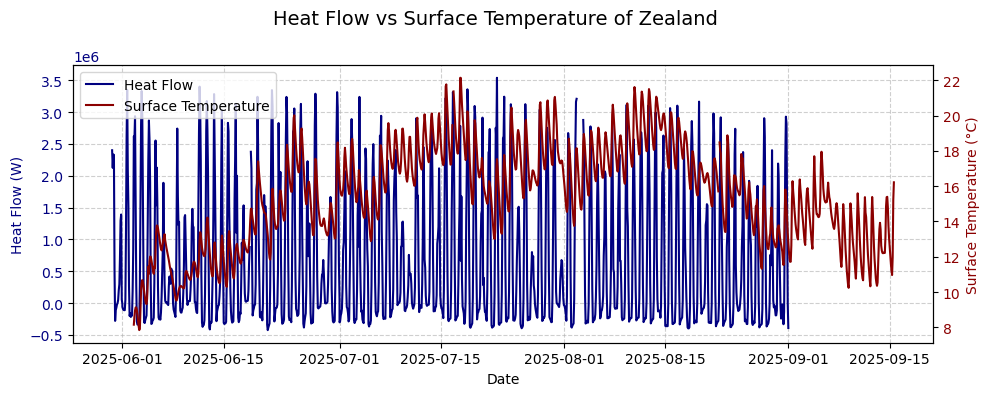

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# First dataset: q_net (W/m²) on left y-axis
ax1.plot(dfrad.index, dfrad['q_rad_zealand'], linestyle='-', color='navy', label='Heat Flow')
ax1.set_xlabel('Date')
ax1.set_ylabel('Heat Flow (W)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True, linestyle='--', alpha=0.6)

# Second dataset: average_new_channel (Temperature) on right y-axis
ax2 = ax1.twinx()
ax2.plot(dfsw.index, dfsw['average_zealand'], linestyle='-', color='darkred', label='Surface Temperature')
ax2.set_ylabel('Surface Temperature (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Title
fig.suptitle('Heat Flow vs Surface Temperature of Zealand', fontsize=14)

# Legend: combine both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

fig.tight_layout()
plt.show()

## Next looking at the relationship between the Zealand River surface water and the groundwater to the west of the stream.

### Taking a look at the indivdual well temperatures and their correlation to surface water based on distance.
### Using the calculation for heat flow due to the conduction of the aquifer material we can see how the Zealands surface water interacts with the individual groundwater wells as if the water traveled directly to them. Each length was measured out via satellite imagery on google earth. In order to do this calculation a value for thermal conductivity must be assigned to the material of the aquifer. A value of 2 W/mK was assigned based on testing done on soils when saturated and their associated conductivity (Kersten, 1948)
#### (Q = K * A * (Delta T / L))

In [10]:
# Merge non-continuous series into one continuous column
dfgw['Temp_gw_03'] = dfgw['TEMPERATURE_gw_ll03_08_22_2025'].combine_first(dfgw['TEMPERATURE_gw_ll03_09_15_2025'])
dfgw['Temp_gw_05'] = dfgw['TEMPERATURE_gw_ll05_08_22_2025'].combine_first(dfgw['TEMPERATURE_gw_ll05_09_15_2025'])

#Calculate Heat Flow Via Conduction to Individual Groundwater Wells
df_heatflow = pd.DataFrame({'gw_03': aquifer_k * GW_Area_03 * (((dfsw['average_zealand'] - dfgw['Temp_gw_03'])) / L_03)})
df_heatflow['gw_05'] = aquifer_k * GW_Area_05 * (((dfsw['average_zealand'] - dfgw['Temp_gw_05'])) / L_05)
df_heatflow['gw_08'] = aquifer_k * GW_Area_05 * (((dfsw['average_zealand'] - dfgw['TEMPERATURE_gw_ll08_09_15_2025'])) / L_08)
df_heatflow

,gw_03,gw_05,gw_08
DateTime,,,
2025-05-30 14:00:00,NaN,NaN,NaN
2025-05-30 16:00:00,NaN,NaN,NaN
2025-05-30 18:00:00,NaN,NaN,NaN
2025-05-30 20:00:00,NaN,NaN,NaN
2025-05-30 22:00:00,NaN,NaN,NaN
...,...,...,...
2025-09-15 06:00:00,-8.138,-7.886,-7.157111
2025-09-15 08:00:00,-9.146,-8.878,-7.919333
2025-09-15 10:00:00,-5.126,-4.838,-4.761556


### Time Series for each wells heat flow and corresponding temperature

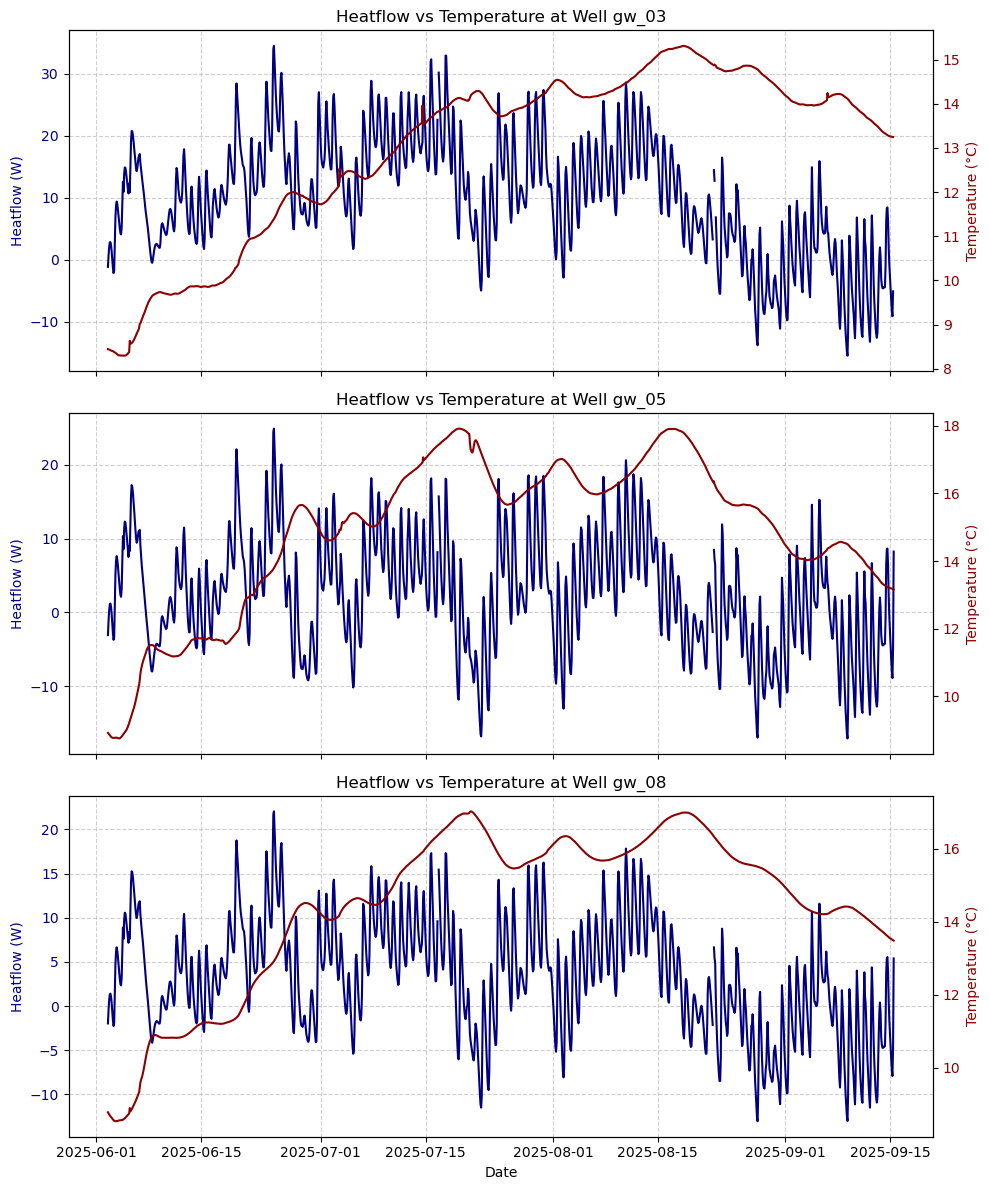

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# --- Well gw_03 ---
ax1 = axes[0]
ax2 = ax1.twinx()
ax1.plot(df_heatflow.index, df_heatflow['gw_03'], color='navy', label='Heatflow gw_03')
ax1.set_ylabel('Heatflow (W)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.plot(dfgw.index, dfgw['Temp_gw_03'], color='darkred', label='Temp gw_03')
ax2.set_ylabel('Temperature (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax1.set_title('Heatflow vs Temperature at Well gw_03')

# --- Well gw_05 ---
ax3 = axes[1]
ax4 = ax3.twinx()
ax3.plot(df_heatflow.index, df_heatflow['gw_05'], color='navy', label='Heatflow gw_05')
ax3.set_ylabel('Heatflow (W)', color='navy')
ax3.tick_params(axis='y', labelcolor='navy')
ax3.grid(True, linestyle='--', alpha=0.6)

ax4.plot(dfgw.index, dfgw['Temp_gw_05'], color='darkred', label='Temp gw_05')
ax4.set_ylabel('Temperature (°C)', color='darkred')
ax4.tick_params(axis='y', labelcolor='darkred')
ax3.set_title('Heatflow vs Temperature at Well gw_05')

# --- Well gw_08 ---
ax5 = axes[2]
ax6 = ax5.twinx()
ax5.plot(df_heatflow.index, df_heatflow['gw_08'], color='navy', label='Heatflow gw_08')
ax5.set_ylabel('Heatflow (W)', color='navy')
ax5.tick_params(axis='y', labelcolor='navy')
ax5.grid(True, linestyle='--', alpha=0.6)

ax6.plot(dfgw.index, dfgw['TEMPERATURE_gw_ll08_09_15_2025'], color='darkred', label='Temp gw_08')
ax6.set_ylabel('Temperature (°C)', color='darkred')
ax6.tick_params(axis='y', labelcolor='darkred')
ax5.set_title('Heatflow vs Temperature at Well gw_08')

# Shared x-axis label
axes[2].set_xlabel('Date')

fig.tight_layout()
plt.show()

### Compute Average GW Temperature Between Zealand and Hale Brook

In [12]:
dfgw['average_between'] = dfgw[['TEMPERATURE_gw_ll03_08_22_2025' ,'TEMPERATURE_gw_ll03_09_15_2025',
                                'TEMPERATURE_gw_ll05_08_22_2025', 'TEMPERATURE_gw_ll05_09_15_2025',
                                'TEMPERATURE_gw_ll08_09_15_2025']].mean(axis=1, skipna=True)

### Calculate Heat Flow From Surface Water To Ground Water Due to Conduction of Aquifer Material

In [13]:
df_heatflow['GWtoSW'] = aquifer_k * GW_Area * (((dfsw['average_zealand'] - dfgw['average_between'])) / L)

### Plotting Relationships Between Groundwater and surface water, heat flow, and radiation.

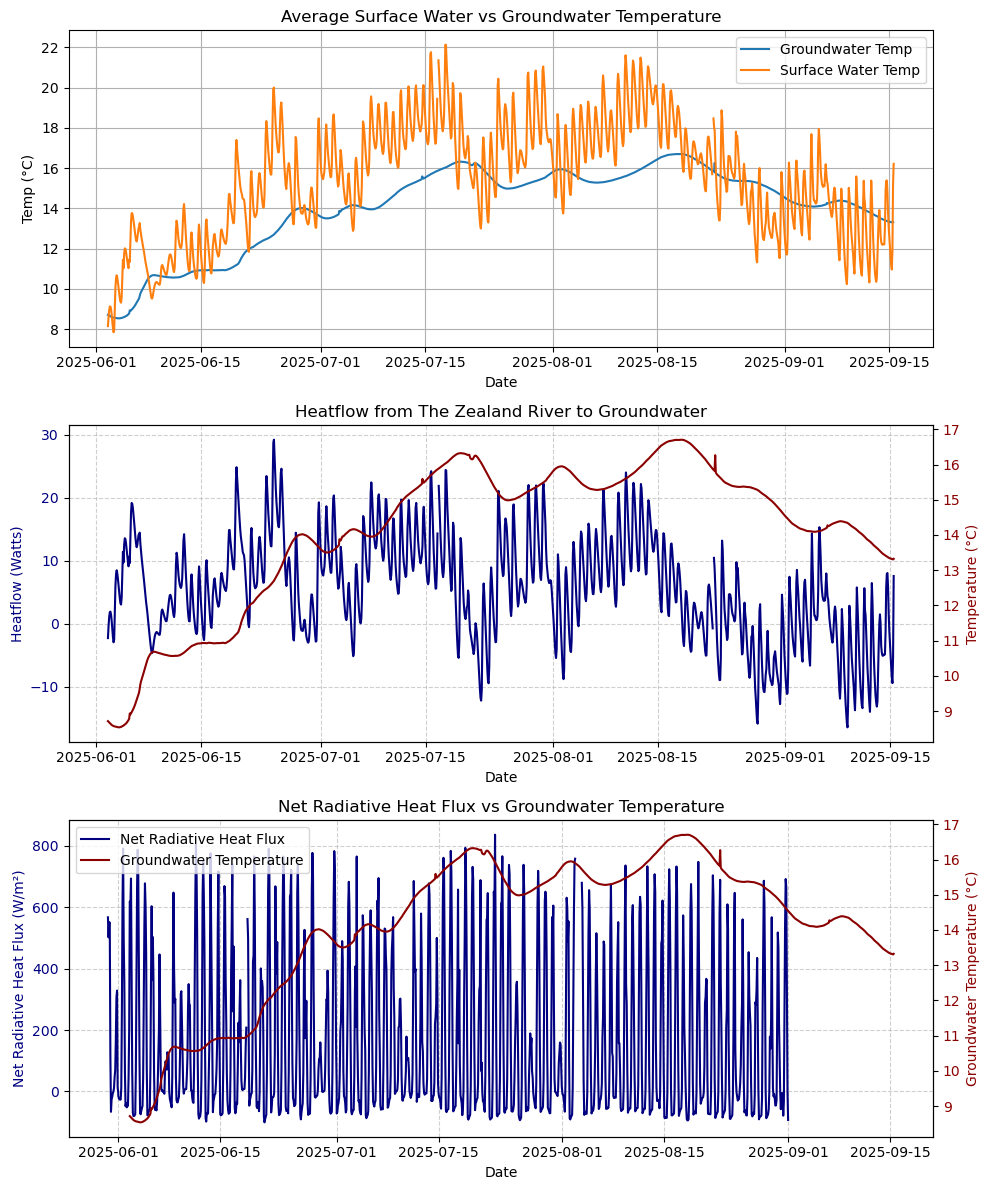

In [14]:
fig, (ax_top, ax_mid, ax_bottom) = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

# Top plot: Average Surface Water vs Groundwater Temperature ---
ax_top.plot(dfgw['average_between'], linestyle='-', label='Groundwater Temp')
ax_top.plot(dfsw['average_zealand'], linestyle='-', label='Surface Water Temp')
ax_top.set_title('Average Surface Water vs Groundwater Temperature')
ax_top.set_xlabel('Date')
ax_top.set_ylabel('Temp (°C)')
ax_top.grid(True)
ax_top.legend()

# Middle plot: Heatflow vs Average Temp with twin y-axis ---
ax1 = ax_mid
ax2 = ax1.twinx()

# Left y-axis: Heatflow
ax1.plot(df_heatflow.index, df_heatflow['GWtoSW'], linestyle='-', color='navy', label='Heatflow GW→SW')
ax1.set_xlabel('Date')
ax1.set_ylabel('Heatflow (Watts)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True, linestyle='--', alpha=0.6)

# Right y-axis: Temperature
ax2.plot(dfgw.index, dfgw['average_between'], linestyle='-', color='darkred', label='Average Temp')
ax2.set_ylabel('Temperature (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Title for middle plot
ax1.set_title('Heatflow from The Zealand River to Groundwater')

# Bottom plot: Net Radiative Heat Flux vs Surface Temperature ---
ax3 = ax_bottom
ax4 = ax3.twinx()

# Left y-axis: Radiative flux
ax3.plot(dfrad.index, dfrad['r_net'], linestyle='-', color='navy', label='Net Radiative Heat Flux')
ax3.set_xlabel('Date')
ax3.set_ylabel('Net Radiative Heat Flux (W/m²)', color='navy')
ax3.tick_params(axis='y', labelcolor='navy')
ax3.grid(True, linestyle='--', alpha=0.6)

# Right y-axis: Surface temp
ax4.plot(dfgw.index, dfgw['average_between'], linestyle='-', color='darkred', label='Groundwater Temperature')
ax4.set_ylabel('Groundwater Temperature (°C)', color='darkred')
ax4.tick_params(axis='y', labelcolor='darkred')

# Title for bottom plot
ax3.set_title('Net Radiative Heat Flux vs Groundwater Temperature')

# Legend for bottom plot
lines_1, labels_1 = ax3.get_legend_handles_labels()
lines_2, labels_2 = ax4.get_legend_handles_labels()
ax3.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

### Finally how does this heat flow from the Zealand impact Hale Brook. It is good to remember that Hale Brook has vastly less tree coverage than the Zealand, in turn allowing more direct heat flow due to radiation.

In [15]:
# Net heat flow due to radiation of zealand using the solar radiation formula
dfrad['q_rad_hale'] = dfrad['r_net'] * hale_sqm * absorptivity_w
dfrad

,inSWMean,inLWMean,outLWMean,r_net,q_rad_zealand,q_rad_hale
DateTime,,,,,,
2025-05-30 14:00:00+00:00,685.9850,341.175,418.625,567.37590,2.400000e+06,5106383.10
2025-05-30 16:00:00+00:00,600.9200,364.125,426.925,502.06480,2.123734e+06,4518583.20
2025-05-30 18:00:00+00:00,646.3500,377.025,432.850,551.74400,2.333877e+06,4965696.00
2025-05-30 20:00:00+00:00,672.3625,353.125,435.100,550.04575,2.326694e+06,4950411.75
2025-05-30 22:00:00+00:00,226.5375,329.725,422.400,120.27025,5.087432e+05,1082432.25
...,...,...,...,...,...,...
2025-08-31 16:00:00+00:00,857.4025,322.400,436.250,692.10835,2.927618e+06,6228975.15
2025-08-31 18:00:00+00:00,820.2425,338.125,443.800,665.35295,2.814443e+06,5988176.55
2025-08-31 20:00:00+00:00,486.3450,321.050,437.250,340.96430,1.442279e+06,3068678.70


# 

### Comparing both the Zealand and Hale in terms of the Heat Flow due to radiation from direct sunlight.

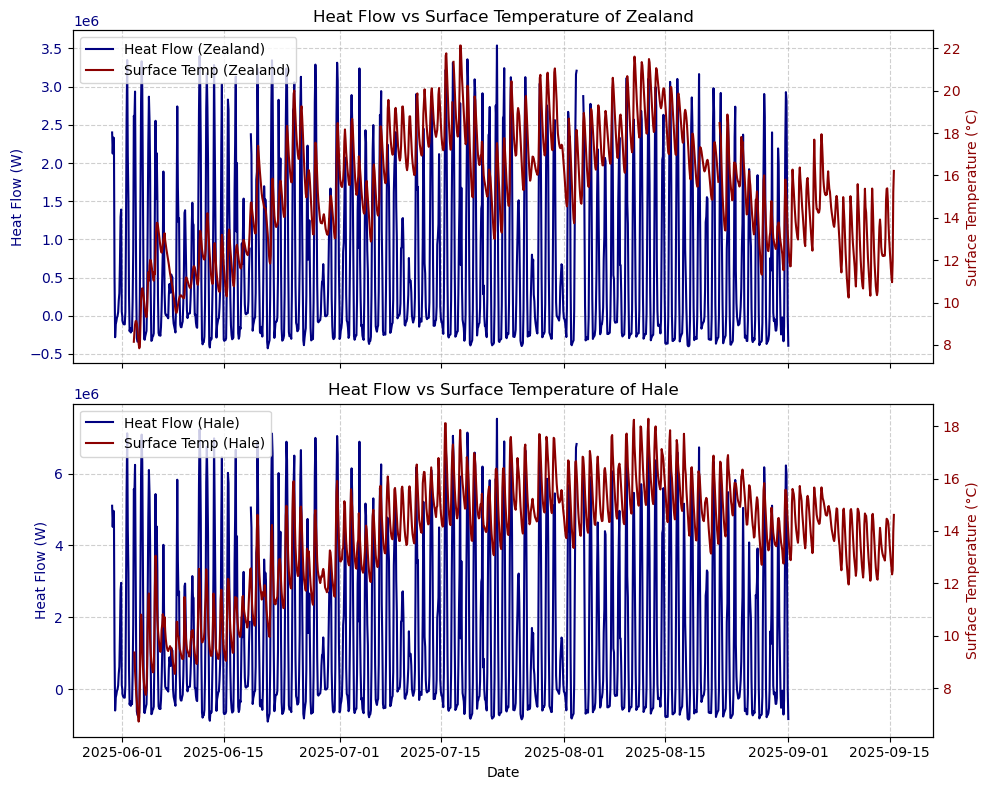

In [ ]:
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Top plot: Zealand ---
ax1 = ax_top
ax2 = ax1.twinx()

ax1.plot(dfrad.index, dfrad['q_rad_zealand'], linestyle='-', color='navy', label='Heat Flow (Zealand)')
ax1.set_ylabel('Heat Flow (W)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.plot(dfsw.index, dfsw['average_zealand'], linestyle='-', color='darkred', label='Surface Temp (Zealand)')
ax2.set_ylabel('Surface Temperature (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

ax1.set_title('Heat Flow vs Surface Temperature of Zealand')

# Legend for top plot
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# --- Bottom plot: Hale ---
ax3 = ax_bottom
ax4 = ax3.twinx()

ax3.plot(dfrad.index, dfrad['q_rad_hale'], linestyle='-', color='navy', label='Heat Flow (Hale)')
ax3.set_ylabel('Heat Flow (W)', color='navy')
ax3.tick_params(axis='y', labelcolor='navy')
ax3.grid(True, linestyle='--', alpha=0.6)

ax4.plot(dfsw.index, dfsw['TEMPERATURE_sw_ll10_09_15_2025'], linestyle='-', color='darkred', label='Surface Temp (Hale)')
ax4.set_ylabel('Surface Temperature (°C)', color='darkred')
ax4.tick_params(axis='y', labelcolor='darkred')

ax3.set_title('Heat Flow vs Surface Temperature of Hale')

# Legend for bottom plot
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()
ax3.legend(lines_3 + lines_4, labels_3 + labels_4, loc='upper left')

# Shared x-axis label
ax_bottom.set_xlabel('Date')

fig.tight_layout()
plt.show()

### Is this relationship caused by influx of groundwater? Comparing heat flow due to radiation and influx of groundwater we can draw a conclussion that heat flow due to due to radiation impacts the Zealand more so than Hale.

### As done above for the zealand surface water flowing into the groundwater, the delta T is inverted to show the flow from groundwater into Hale Brook.

In [17]:
df_heatflow['SWtoGW'] = aquifer_k * GW_Area * (((dfgw['average_between'] - dfsw['TEMPERATURE_sw_ll10_09_15_2025'])) / L)

### Plotting the relationship between groundwater and surface water of Hale. One figure shows temperature comparison the other shows heat flow compared to surfacw water temps.

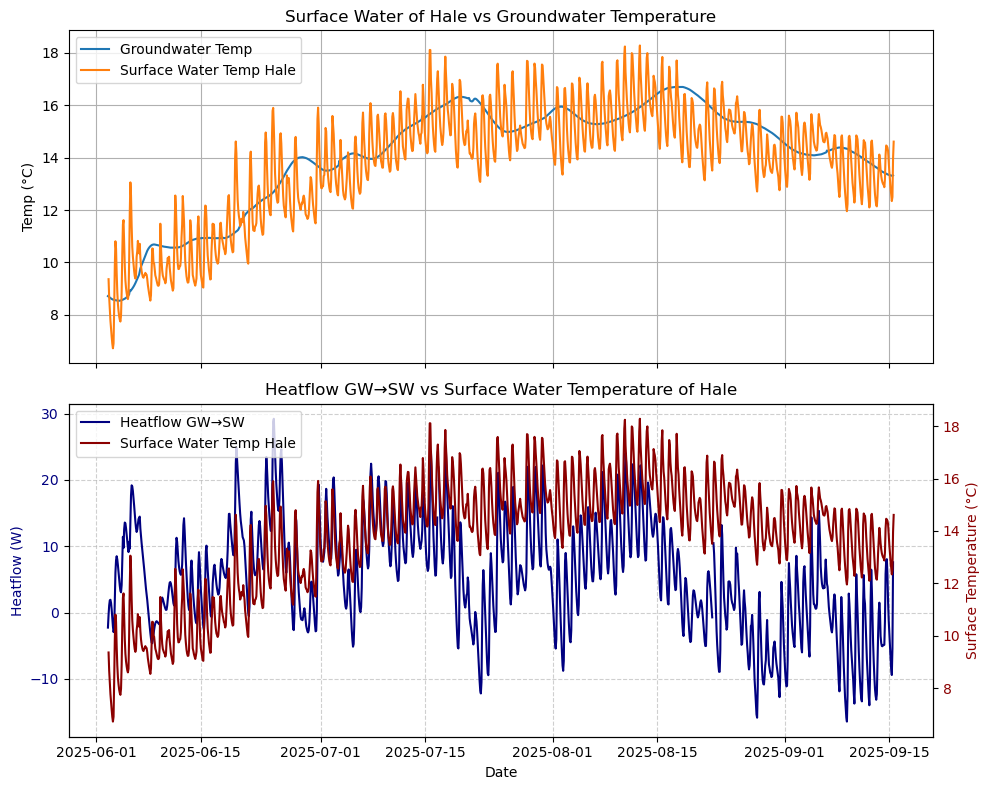

In [18]:
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Top plot: Groundwater vs Surface Water Temp (Hale) ---
ax_top.plot(dfgw.index, dfgw['average_between'], linestyle='-', label='Groundwater Temp')
ax_top.plot(dfsw.index, dfsw['TEMPERATURE_sw_ll10_09_15_2025'], linestyle='-', label='Surface Water Temp Hale')
ax_top.set_title('Surface Water of Hale vs Groundwater Temperature')
ax_top.set_ylabel('Temp (°C)')
ax_top.grid(True)
ax_top.legend()

# --- Bottom plot: Heatflow vs Surface Water Temp (Hale) ---
ax1 = ax_bottom
ax2 = ax1.twinx()

# Left y-axis: Heatflow
ax1.plot(df_heatflow.index, df_heatflow['GWtoSW'], linestyle='-', color='navy', label='Heatflow GW→SW')
ax1.set_ylabel('Heatflow (W)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True, linestyle='--', alpha=0.6)

# Right y-axis: Surface Water Temp Hale
ax2.plot(dfsw.index, dfsw['TEMPERATURE_sw_ll10_09_15_2025'], linestyle='-', color='darkred', label='Surface Water Temp Hale')
ax2.set_ylabel('Surface Temperature (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Title for bottom plot
ax1.set_title('Heatflow GW→SW vs Surface Water Temperature of Hale')

# Legend combining both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Shared x-axis label
ax_bottom.set_xlabel('Date')

fig.tight_layout()
plt.show()

### From this anaylsis of the water temperature data and radiation data, there is a strong correlation between surface water from the Zealand influencing the temperature of the groundwater to the west. Looking further we can see a tighter temperature correlation of groundwater temperature to Hale Brook, as well as heat flow to Hale, showing that the groundwater influences the stream rather than the surface water of Hale influencing the groundwater.

## Works Cited
#### Stonestrom, D. A., Constantz, J., & Survey (U.S.), G. (2003). Heat as a Tool for Studying the Movement of Ground Water Near Streams. U.S. Department of the Interior, U.S. Geological Survey. https://books.google.com/books?id=xMPJ90rhi5wC
#### Kersten, M. S. (1948). The thermal conductivity of soils. In Proceedings, Highway Research Board (Vol. 28, pp. 391-409).
#### Bahlburg , H., & Breitkreuz, C. (2012). The role of sea ice in Earth’s energy budget. The role of sea ice in Earth’s energy budget. | Seaice portal. https://www.meereisportal.de/en/learn-more/sea-ice-physics/sea-ice-and-energy-budget#:~:text=Ice%20and%20snow%20are%20very%20bright%20and,bodies%20is%20very%20low%20(0.05%20%E2%80%93%200.25). 
